In [3]:
cd C:\Users\zsassi\test

c:\Users\zsassi\test


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
test_df = pd.read_csv('test.csv')
test_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  WikiId       415 non-null    float64
 12  Name_wiki    415 non-null    object 
 13  Age_wiki     415 non-null    float64
 14  Hometown     415 non-null    object 
 15  Boarded      415 non-null    object 
 16  Destination  415 non-null    object 
 17  Lifeboat     157 non-null    object 
 18  Body         43 non-null     object 
 19  Class   

In [62]:
test_ids = test_df['PassengerId']

In [63]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,415.000000,415.000000,415.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,643.684337,29.616241,2.257831
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,379.508988,13.400225,0.847577
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,2.000000,0.170000,1.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,316.500000,21.000000,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,641.000000,27.000000,3.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,965.500000,37.000000,3.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1313.000000,67.000000,3.000000


In [64]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [65]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


In [66]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

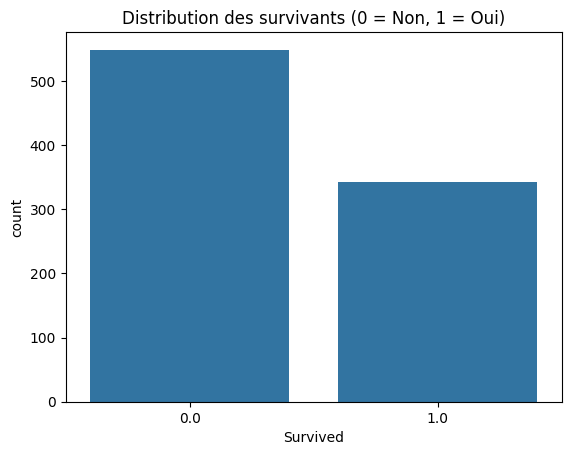

In [68]:
sns.countplot(data=train_df, x='Survived')
plt.title("Distribution des survivants (0 = Non, 1 = Oui)")
plt.show()


In [69]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])



train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')



train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

train_df['Title'] = train_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
train_df['Title'] = train_df['Title'].map(title_mapping)

train_df['Title'] = train_df['Title'].fillna(0)

In [70]:
train_df.drop(columns=['Name', 'Ticket'], inplace=True)
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0,1,2,3,4])
train_df['AgeGroup'] = train_df['AgeGroup'].astype(int)
train_df.drop(columns=['Cabin'], inplace=True)

In [71]:
X_Train = train_df.drop('Survived', axis=1)
y_Train = train_df['Survived']


In [72]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
WikiId           3
Name_wiki        3
Age_wiki         3
Hometown         3
Boarded          3
Destination      3
Lifeboat       261
Body           375
Class            3
dtype: int64

In [73]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])



test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')



test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

test_df['Title'] = test_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test_df['Title'] = test_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
test_df['Title'] = test_df['Title'].map(title_mapping)

test_df['Title'] = test_df['Title'].fillna(0)


In [74]:
test_df.drop(columns=['Name', 'Ticket'], inplace=True)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0,1,2,3,4])
test_df['AgeGroup'] = test_df['AgeGroup'].astype(int)
test_df.drop(columns=['Cabin'], inplace=True)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [76]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print("Confusion Matrix :")
    print(cm)

--- Logistic Regression ---
Accuracy  : 0.7877
Precision : 0.7432
Recall    : 0.7432
Confusion Matrix :
[[86 19]
 [19 55]]
--- Random Forest ---
Accuracy  : 0.8436
Precision : 0.8286
Recall    : 0.7838
Confusion Matrix :
[[93 12]
 [16 58]]


c:\Users\zsassi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy  : 0.8045
Precision : 0.7600
Recall    : 0.7703
Confusion Matrix :
[[87 18]
 [17 57]]


In [80]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X, y)

print(grid.best_params_)

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
best_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=6, 
    min_samples_split=2, 
    random_state=42
)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [84]:
features = X_train.columns  # ou définis manuellement la liste exacte si besoin
test = test_df[features]
final_predictions = best_model.predict(test)

In [85]:
final_predictions = best_model.predict(test)


In [93]:
submission = pd.DataFrame({
    'PassengerId': test_ids.values,         # .values pour éviter les erreurs d'alignement
    'Survived': final_predictions.astype(int)  # Assure que ce sont des entiers 0 ou 1
})

# 7. Sauvegarder le CSV
submission.to_csv('submission.csv', index=False)

# 8. Vérifier le résultat
print(submission.head())
print(submission.shape)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
(418, 2)


In [94]:
print(submission.to_csv(index=False))

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,0
911,1
912,0
913,1
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,0
926,0
927,0
928,0
929,0
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,1
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,1
957,1
958,1
959,0
960,0
961,1
962,1
963,0
964,0
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,1
973,0
974,0
975,0
976,0
977,0
978,1
979,0
980,1
981,1
982,1
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,0
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,0
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,0
10

In [95]:
submission.to_csv('submission.csv', index=False)